<a href="https://colab.research.google.com/github/Guzman2304/IA_2025_GuzmanQuintero/blob/main/Avanzada_Cuaderno_8_CNN_Transferencia_de_aprendizaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje por Transferencia y Ajuste con TensorFlow y Keras

Este cuaderno presenta una introducción al aprendizaje por transferencia, ajuste fino y modelos embebidos o en cascada. También incluye una tabla de modelos preentrenados populares, recomendaciones prácticas y un taller práctico para implementar este enfoque con TensorFlow y Keras.

---

## 1. Definición de Aprendizaje por Transferencia

**Aprendizaje por transferencia (Transfer Learning)** es una técnica en la cual un modelo preentrenado en una tarea se reutiliza como punto de partida para una nueva tarea relacionada. Este enfoque permite aprovechar el conocimiento adquirido previamente, reduciendo el tiempo de entrenamiento y mejorando el desempeño en tareas con datos limitados.

### **Ajuste fino (Fine-tuning)**
- Consiste en entrenar las capas superiores de un modelo preentrenado junto con las capas personalizadas añadidas.
- Se utiliza cuando los datos de la tarea destino son similares a los datos del modelo original, pero se busca optimizar la precisión para una tarea específica.

### **Modelos embebidos o en cascada**
- Modelos embebidos: Incorporan un modelo preentrenado como parte de una red más grande.
- Modelos en cascada: Utilizan el modelo preentrenado para generar características intermedias que luego se procesan con modelos adicionales.

---

## ¿Reentrenar un modelo por transferencia es hacer Fine-Tuning?

No necesariamente. Reentrenar un modelo por transferencia no siempre implica hacer **fine-tuning**. Ambas técnicas están relacionadas, pero son diferentes en cómo se aplican al modelo preentrenado.

---

### **Diferencia entre Aprendizaje por Transferencia y Fine-Tuning**

#### 1. **Aprendizaje por transferencia básico:**
- **Qué se hace:**  
  Se congela (no se entrena) el modelo preentrenado, y se añade un clasificador personalizado (normalmente capas densas) encima. Solo se entrenan estas nuevas capas.
- **Cuándo usarlo:**  
  Cuando los datos de la tarea destino son limitados o muy diferentes a los datos en los que el modelo fue preentrenado.
- **Ventajas:**  
  - Menor costo computacional.
  - Riesgo bajo de sobreajuste.
- **Ejemplo en código:**

  ```python
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  
  for layer in base_model.layers:
      layer.trainable = False  # Congelar todas las capas del modelo base

  model = Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(num_classes, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_data, epochs=10, validation_data=val_data)
  ```

### **Fine-Tuning (ajuste fino):**
- **Qué se hace:**  
  Se descongelan (parcial o totalmente) las capas superiores del modelo preentrenado, además de entrenar el clasificador personalizado. Esto ajusta el modelo preentrenado a las características específicas del nuevo conjunto de datos.
  
- **Cuándo usarlo:**  
  Cuando los datos de la tarea destino son similares al conjunto de datos del preentrenamiento (por ejemplo, ambas tareas son de clasificación de imágenes).

- **Ventajas:**  
  - Mejora el rendimiento del modelo para tareas específicas.

- **Ejemplo en código:**
  ```python
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:-10]:
      layer.trainable = False  # Congelar todas excepto las últimas 10 capas

  model = Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(num_classes, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_data, epochs=10, validation_data=val_data)


---

## 2. Modelos Preentrenados Populares

A continuación, se presenta una tabla con los modelos preentrenados más utilizados, sus características y casos de uso:

| **Modelo**      | **Arquitectura**   | **Características**                                                                 | **Casos de uso**                     |
|------------------|--------------------|-------------------------------------------------------------------------------------|---------------------------------------|
| **VGG16**       | CNN profunda       | Arquitectura simple, con capas convolucionales y densas. Entrenado en ImageNet.     | Clasificación de imágenes, extracción de características. |
| **ResNet50**    | CNN residual       | Introduce bloques residuales para evitar el problema de degradación en redes profundas. | Clasificación, detección de objetos. |
| **InceptionV3** | CNN de múltiples ramas | Optimización del uso de recursos computacionales mediante convoluciones de varias dimensiones. | Clasificación de imágenes, visión por computadora. |
| **MobileNetV2** | CNN ligera         | Diseñado para dispositivos móviles y embebidos. Muy eficiente.                     | Reconocimiento en tiempo real.       |
| **EfficientNet**| CNN eficiente      | Optimización entre precisión y eficiencia. Varios tamaños disponibles (B0 a B7).   | Clasificación, segmentación.         |
| **BERT**        | Transformer         | Modelo de lenguaje natural, preentrenado para tareas como clasificación de texto y generación de lenguaje. | Procesamiento de lenguaje natural.   |

---

## 3. Uso de un Modelo Preentrenado

### Indicaciones para usar un modelo preentrenado:
1. **Cargar el modelo preentrenado:**
   - Usar las librerías de TensorFlow/Keras para cargar el modelo con sus pesos preentrenados.
   - Ejemplo:
     ```python
     from tensorflow.keras.applications import ResNet50

     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
     ```

2. **Congelar capas iniciales:**
   - Las capas iniciales capturan características generales que son útiles para muchas tareas.
   - Para evitar sobrescribir estos pesos durante el entrenamiento:
     ```python
     for layer in base_model.layers:
         layer.trainable = False
     ```

3. **Agregar capas personalizadas:**
   - Añadir capas densas o de clasificación específicas para la nueva tarea:
     ```python
     from tensorflow.keras import layers, models

     model = models.Sequential([
         base_model,
         layers.Flatten(),
         layers.Dense(256, activation='relu'),
         layers.Dropout(0.5),
         layers.Dense(num_classes, activation='softmax')
     ])
     ```

4. **Ajuste fino (opcional):**
   - Descongelar algunas capas superiores del modelo base para mejorar la precisión:
     ```python
     for layer in base_model.layers[-10:]:  # Descongelar últimas 10 capas
         layer.trainable = True
     ```

---

## 4. Recomendaciones para Mejorar la Eficiencia del Modelo

1. **Tamaño de entrada:**
   - Usa un tamaño de entrada adecuado para el modelo. Por ejemplo, 224x224 para ResNet o VGG.
2. **Número de capas:**
   - Congela las capas iniciales y ajusta finamente solo las capas finales si los datos de destino son similares al conjunto de datos original.
3. **Regularización:**
   - Usa técnicas como dropout y regularización L2 para prevenir sobreajuste.
4. **Optimización del entrenamiento:**
   - Ajusta el learning rate con un optimizador como Adam o SGD con programación de aprendizaje.
5. **Uso de GPUs:**
   - Entrena en una GPU para reducir el tiempo de entrenamiento, especialmente para modelos grandes.

---

## 5. Librerías y Métodos de TensorFlow/Keras

### Librerías principales:
- **`tensorflow.keras.applications`**: Contiene modelos preentrenados como VGG, ResNet, MobileNet, entre otros.
- **`tensorflow.keras.layers`**: Para agregar capas personalizadas como Dense, Dropout, y Flatten.
- **`tensorflow.keras.optimizers`**: Proporciona optimizadores como Adam y SGD.
- **`tensorflow.keras.preprocessing`**: Ayuda a cargar y preprocesar imágenes.

### Métodos útiles:
1. **`applications`**:
   - Para cargar modelos preentrenados.
     ```python
     from tensorflow.keras.applications import MobileNetV2
     model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
     ```
2. **`Model.compile`**:
   - Configura el modelo para el entrenamiento:
     ```python
     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
     ```
3. **`Model.fit`**:
   - Entrena el modelo:
     ```python
     history = model.fit(train_data, epochs=10, validation_data=val_data)
     ```
4. **`Model.evaluate`**:
   - Evalúa el modelo:
     ```python
     loss, accuracy = model.evaluate(test_data)
     ```

---

.


## Recursos para Consultar Modelos Preentrenados y Detalles

### 1. Enlaces útiles sobre modelos preentrenados
- **[Keras Applications](https://keras.io/api/applications/?utm_source=chatgpt.com)**:  
  Lista detallada de modelos preentrenados disponibles en Keras, con información sobre:
  - Arquitecturas
  - Tamaños de imagen esperados
  - Casos de uso comunes
  
- **[Deep Learning con redes pre-entrenadas en ImageNet (Medium)](https://medium.com/neuron4/redes-pre-entrenadas-en-imagenet-30d858c37b1f?utm_source=chatgpt.com)**:  
  Artículo que explica el uso de redes preentrenadas en ImageNet y detalla las dimensiones de entrada requeridas por diferentes modelos.

- **[Learnable Resizer en Keras](https://keras.io/examples/vision/learnable_resizer/?utm_source=chatgpt.com)**:  
  Ejemplo avanzado sobre cómo implementar un módulo de redimensionamiento aprendible, que permite optimizar el tamaño de las imágenes de entrada para mejorar el rendimiento del modelo.

---

### 2. Tamaño de imágenes para modelos preentrenados
La mayoría de los modelos preentrenados requieren que las imágenes de entrada coincidan con un tamaño específico. Por ejemplo:
- **VGG16 y ResNet50**: 224x224 píxeles.
- **InceptionV3**: 299x299 píxeles.
- **EfficientNet**: Varía según la versión (por ejemplo, EfficientNetB0 requiere 224x224, mientras que EfficientNetB7 usa 600x600).

Si las imágenes de entrada no tienen estas dimensiones, es importante realizar el redimensionamiento antes de alimentarlas al modelo.

---

### 3. Redimensionamiento: ¿Modelo o Preprocesamiento?
- Los modelos preentrenados **no redimensionan automáticamente** las imágenes en sus primeras capas. Por lo tanto, debes realizar el redimensionamiento como parte del preprocesamiento de datos.
- Para redimensionar las imágenes en TensorFlow/Keras:
  ```python
  from tensorflow.keras.preprocessing.image import ImageDataGenerator

  datagen = ImageDataGenerator(
      rescale=1.0 / 255,
      target_size=(224, 224)  # Tamaño para ResNet50 o VGG16
  )
  train_data = datagen.flow_from_directory('data/train', target_size=(224, 224))


## Talleres prácticos

A continuación, implementaremos dos ejemplo prácticos utilizando aprendizaje por transferencia con TensorFlow y Keras.
En el primero haremos uso de un modelo preentrendado y luego haremos un ajuste fino al modelo mediante la técnica de modelo por transferencia.

### VGG16

**VGG16** es una arquitectura de red neuronal convolucional (CNN) desarrollada por el grupo de investigación **Visual Geometry Group (VGG)** de la Universidad de Oxford por **K. Simonyan y A. Zisserman**. Fue presentada en 2014 como parte del trabajo titulado **"Very Deep Convolutional Networks for Large-Scale Image Recognition"**, y es una de las arquitecturas más populares en el ámbito de la visión por computadora.

El modelo logró una precisión de prueba _top-5_ del **92.7%** en el conjunto de datos **ImageNet**, que contiene más de 14 millones de imágenes organizadas en 1,000 clases. **VGG16** fue uno de los modelos destacados presentados en la competencia **ILSVRC-2014**.

#### Innovaciones:
- **Mejora sobre AlexNet:**  
  Sustituye los filtros de kernel de gran tamaño (11 y 5 en la primera y segunda capa convolucional de AlexNet, respectivamente) por múltiples filtros de tamaño **3×3** consecutivos.
  
- **Entrenamiento intensivo:**  
  Fue entrenado durante semanas utilizando GPUs **NVIDIA Titan Black**.

#### Importancia:
**VGG16** marcó un hito en la evolución de las redes profundas al proponer una arquitectura más simple y eficiente, manteniendo un alto rendimiento en tareas de clasificación y extracción de características.

En la siguiente imagen podrá apreciar la arquitectura del modelo.


![imagen](https://github.com/adiacla/Curso/blob/main/vgg16.png?raw=true)

![imagen](https://github.com/adiacla/bigdata/blob/master/vgg16a.png?raw=true)

tomado de:  https://neurohive.io/en/popular-networks/vgg16/

#### Principales características:
- **Profundidad:**  
  - Tiene 16 capas de aprendizaje (13 convolucionales y 3 totalmente conectadas).
- **Estructura simple y uniforme:**  
  - Utiliza exclusivamente convoluciones de tamaño 3x3 con pasos pequeños (stride 1) y capas de pooling 2x2, lo que simplifica el diseño y facilita su implementación.
- **Entrenamiento en ImageNet:**  
  - Fue entrenada en el conjunto de datos ImageNet, que contiene millones de imágenes clasificadas en 1,000 categorías.
- **Tamaño de entrada:**  
  - Requiere imágenes con dimensiones **224x224 píxeles** y 3 canales (RGB).

#### Ventajas:
- **Buen rendimiento:**  
  VGG16 logró un alto rendimiento en tareas de clasificación, especialmente en el desafío ImageNet.
- **Transferencia de aprendizaje:**  
  Su simplicidad y capacidad para generalizar bien en nuevas tareas lo convierten en un excelente modelo para usar en el aprendizaje por transferencia.

#### Desventajas:
- **Requiere alta capacidad computacional:**  
  Dada su gran cantidad de parámetros (aproximadamente 138 millones), es un modelo pesado y puede ser más lento de entrenar y utilizar en comparación con arquitecturas más modernas.

#### Usos comunes:
- Clasificación de imágenes.
- Extracción de características para modelos personalizados.
- Transferencia de aprendizaje en tareas específicas, como detección de objetos o segmentación.

VGG16 sigue siendo relevante como punto de partida para muchos proyectos y como referencia en el diseño de redes convolucionales.


Vamos a predecir una imagen de perro, bus y vaso, usando el modelo.

##Descargar y Preparar las Imágenes
Primero, descargamos el archivo imagenesvgg16.zip desde el enlace proporcionado y lo descomprimimos en Google Colab.

In [1]:
# Descargar el archivo .zip
!wget https://github.com/adiacla/bigdata/raw/refs/heads/master/imagenesvgg16.zip -P /content/

# Descomprimir el archivo
import zipfile

with zipfile.ZipFile('/content/imagenesvgg16.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')


--2025-10-14 13:59:21--  https://github.com/adiacla/bigdata/raw/refs/heads/master/imagenesvgg16.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/imagenesvgg16.zip [following]
--2025-10-14 13:59:21--  https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/imagenesvgg16.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191649 (187K) [application/zip]
Saving to: ‘/content/imagenesvgg16.zip’

imagenesvgg16.zip   100%[===================>] 187.16K  --.-KB/s    in 0.02s   

2025-10-14 13:59:21 (10.8 MB/s) - ‘/content/imagenesvgg16.zip’ saved [191649/

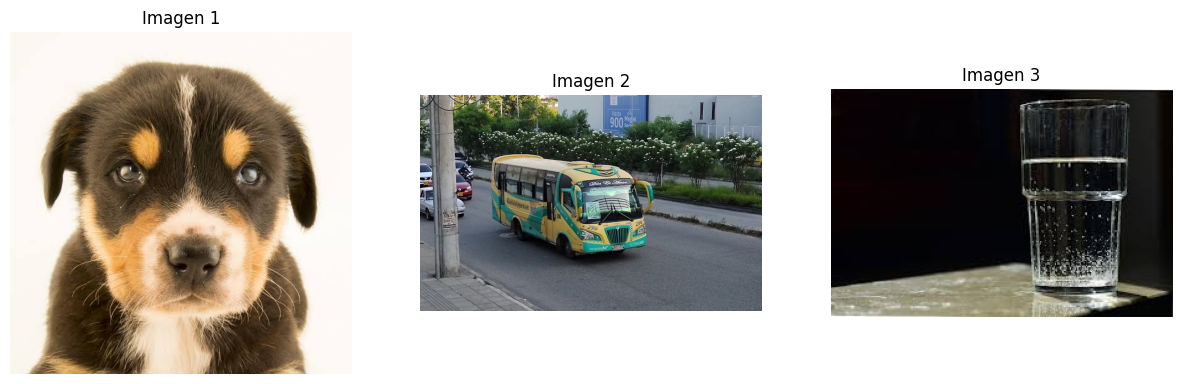

In [2]:
import matplotlib.pyplot as plt
# Importar keras
import tensorflow.keras as keras

# Define img_paths here with the paths to your images
img_paths = ['/content/perro.jpg', '/content/bus.jpg', '/content/vaso.jpg']

# Mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    img = keras.utils.load_img(img_paths[i])
    ax.imshow(img)
    ax.axis('off')  # Desactivar los ejes
    ax.set_title(f'Imagen {i+1}')

plt.show()
# Si se desea realizar la clasificación con VGG16, descomentar el siguiente código:
# from keras.applications.vgg16 import decode_predictions
# predictions = [model.predict(x) for x in images]
# decoded_predictions = [decode_predictions(pred, top=3) for pred in predictions]
# print(decoded_predictions)


## Importar las Librerías Necesarias
En esta sección, importamos las librerías necesarias, como keras y VGG16 para utilizar el modelo preentrenado.


In [3]:
import keras
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions
import numpy as np


##Cargar el Modelo Preentrenado VGG16
Cargamos el modelo VGG16 con los pesos preentrenados en ImageNet, sin incluir la capa final (include_top=False), ya que solo necesitamos las características de las imágenes para predecir.

In [4]:
# Cargar el modelo VGG16 preentrenado sin la capa final
model = VGG16(weights='imagenet', include_top=True)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


##Cargar y Preparar las Imágenes para Predicción
En esta sección, cargamos las imágenes, las ajustamos a un tamaño adecuado (224x224 píxeles) para VGG16, y las preprocesamos de acuerdo con lo que espera el modelo.

In [7]:
img_paths = ['/content/perro.jpg', '/content/bus.jpg', '/content/vaso.jpg']
images = []

for img_path in img_paths:
    img = keras.utils.load_img(img_path, target_size=(224, 224))
    x = keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images.append(x)


In [8]:
images

[array([[[[137.061  , 130.22101, 128.32   ],
          [137.061  , 130.22101, 128.32   ],
          [137.061  , 130.22101, 128.32   ],
          ...,
          [142.061  , 132.22101, 130.32   ],
          [142.061  , 132.22101, 130.32   ],
          [142.061  , 132.22101, 130.32   ]],
 
         [[137.061  , 130.22101, 128.32   ],
          [137.061  , 130.22101, 128.32   ],
          [137.061  , 130.22101, 128.32   ],
          ...,
          [142.061  , 132.22101, 130.32   ],
          [142.061  , 132.22101, 130.32   ],
          [142.061  , 132.22101, 130.32   ]],
 
         [[137.061  , 130.22101, 128.32   ],
          [137.061  , 130.22101, 128.32   ],
          [137.061  , 130.22101, 128.32   ],
          ...,
          [142.061  , 132.22101, 130.32   ],
          [142.061  , 132.22101, 130.32   ],
          [142.061  , 132.22101, 130.32   ]],
 
         ...,
 
         [[133.061  , 129.22101, 126.32   ],
          [133.061  , 129.22101, 126.32   ],
          [133.061  , 129.2210

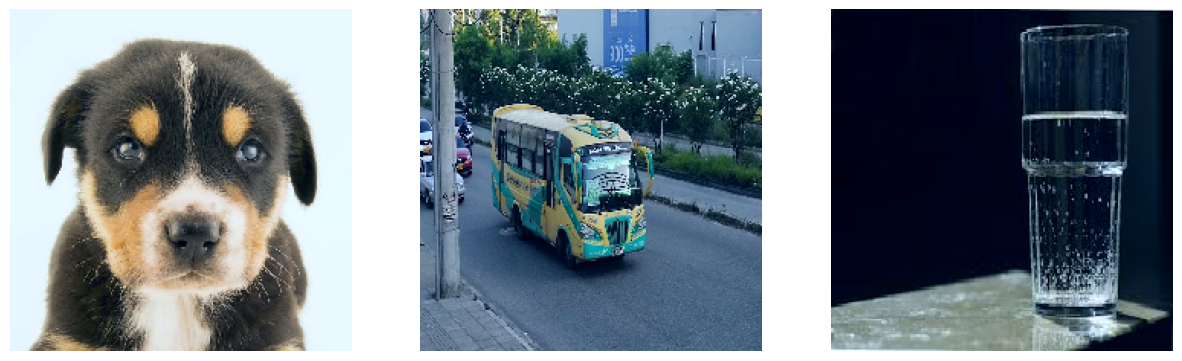

In [13]:
imagenes3 = images[:3]  # no [:4], porque pediste 3 primeras
plt.figure(figsize=(15, 5))

for i, img in enumerate(imagenes3):
    # Copiamos la imagen preprocesada para no alterar la original
    img_rgb = img[0].copy()

    # Invertir canales BGR -> RGB
    img_rgb = img_rgb[..., ::-1]

    # Como preprocess_input restó las medias, debemos sumarlas para visualización
    img_rgb[..., 0] += 103.939  # Canal azul
    img_rgb[..., 1] += 116.779  # Canal verde
    img_rgb[..., 2] += 123.68   # Canal rojo

    # Normalizar a rango [0,1] para mostrar correctamente
    img_rgb = np.clip(img_rgb / 255.0, 0, 1)

    # Mostrar la imagen
    plt.subplot(1, 3, i + 1)
    plt.imshow(img_rgb)
    plt.axis('off')

plt.show()



##Realizar la Predicción de Características con VGG16
Pasamos las imágenes por el modelo VGG16 para obtener sus características (features) utilizando la función predict.

In [14]:
# Obtener las predicciones y decodificarlas
predictions = [model.predict(x) for x in images]
decoded_predictions = [decode_predictions(pred, top=3) for pred in predictions]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [15]:
decoded_predictions

[[[('n02107908', 'Appenzeller', np.float32(0.7082941)),
   ('n02108000', 'EntleBucher', np.float32(0.15813465)),
   ('n02107574', 'Greater_Swiss_Mountain_dog', np.float32(0.07536807))]],
 [[('n03769881', 'minibus', np.float32(0.782345)),
   ('n04487081', 'trolleybus', np.float32(0.076497406)),
   ('n03796401', 'moving_van', np.float32(0.048197016))]],
 [[('n02823750', 'beer_glass', np.float32(0.3171658)),
   ('n03062245', 'cocktail_shaker', np.float32(0.31584823)),
   ('n03916031', 'perfume', np.float32(0.10127855))]]]

El decoded_predictions es una lista anidada que contiene las predicciones del modelo VGG16 para cada imagen ingresada. (3 porque dijismo top 3). Cada elemento de la lista representa las predicciones para una imagen y está compuesto por una lista de tuplas. Veamos su estructura en detalle:

Desglose de la Estructura
Cada tupla tiene la forma: (class_id, class_name, probability)


**class_id:** Es el identificador de la clase en el conjunto de datos ImageNet.

Por ejemplo, 'n02107908' corresponde a una clase específica de perro.

**class_name:** Es el nombre de la clase en inglés, como 'Appenzeller'.

**probability:** Es la probabilidad (entre 0 y 1) asignada a esa clase por el modelo para la imagen dada.




```
[('n02107908', 'Appenzeller', 0.70829445),
 ('n02108000', 'EntleBucher', 0.15813427),
 ('n02107574', 'Greater_Swiss_Mountain_dog', 0.07536804)]

```
Appenzeller: Tiene una probabilidad de 70.83%, por lo que el modelo predice que esta es la clase más probable.
EntleBucher: Segunda clase más probable, con 15.81%.
Greater_Swiss_Mountain_dog: Probabilidad de 7.54%.

Y asi sucesivamente.



# **Proyecto: Clasificación de Imágenes de Gatos y Perros con Aprendizaje de Transferencia**

## **Objetivo**
El objetivo de este proyecto es clasificar imágenes de gatos y perros utilizando aprendizaje de transferencia, adaptando un modelo previamente entrenado para lograr una tarea específica de clasificación de imágenes. Esto permitirá reducir el tiempo y los recursos computacionales necesarios para el entrenamiento, aprovechando las características ya aprendidas por modelos preentrenados en conjuntos de datos de gran escala.

---

## **Pasos del Proyecto**

1. **Comprender los datos**  
   - Analizar el conjunto de datos de entrada, compuesto por imágenes de gatos y perros.
   - Dividir el conjunto de datos en entrenamiento, validación y prueba.

2. **Crear la tubería de entrada**  
   - Implementar una tubería de entrada utilizando `Keras ImageDataGenerator` para procesar y aumentar las imágenes.
   - Realizar las transformaciones necesarias, como redimensionamiento, normalización y aumento de datos.

3. **Componer el modelo**
   - Cargar un modelo base preentrenado con sus pesos iniciales, por ejemplo, un modelo como MobileNetV2 o ResNet50.
   - Congelar las capas convolucionales base para preservar las características ya aprendidas.

4. **Agregar capas de clasificación**
   - Apilar nuevas capas totalmente conectadas (Dense) en la parte superior del modelo base.
   - Definir una capa de salida con activación `softmax` o `sigmoid` según el número de clases objetivo.

5. **Entrenamiento del modelo**
   - Realizar dos enfoques principales:
     - **Extracción de características**: Entrenar únicamente las capas superiores del modelo agregadas, manteniendo congelada la base convolucional.
     - **Ajuste fino**: Descongelar ciertas capas superiores del modelo base para entrenarlas conjuntamente con las capas de clasificación añadidas, ajustando las representaciones de características de orden superior.

6. **Evaluación del modelo**
   - Validar el rendimiento del modelo utilizando el conjunto de datos de validación.
   - Evaluar su precisión final sobre el conjunto de datos de prueba.

---

## **Flujo de Trabajo General**
1. Análisis de datos y creación de tubería de entrada.  
2. Carga del modelo base preentrenado.  
3. Definición y entrenamiento del modelo para extracción de características.  
4. Ajuste fino del modelo para mejorar su rendimiento.  
5. Evaluación final y ajuste según métricas obtenidas.

---

## **Adaptación**
Este proyecto es una adaptación del tutorial de aprendizaje de transferencia publicado por TensorFlow, que puedes consultar en [https://www.tensorflow.org/tutorials/images/transfer_learning?hl=es-419](https://www.tensorflow.org/tutorials/images/transfer_learning?hl=es-419).


In [16]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

## **Preprocesamiento de Datos**

### **Descarga de Datos**
En este taller se trabajará con un conjunto de datos que incluye miles de imágenes clasificadas en dos categorías: gatos y perros. Como primer paso, se descargará un archivo zip que contiene estas imágenes, el cual deberá ser extraído y organizado


In [17]:

# Especifica la ubicación deseada para guardar el archivo
save_dir = '/content'

# Descarga y descomprime el conjunto de datos de gatos y perros
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True, cache_dir=save_dir)

# Corrección: Obtener el nombre del directorio base del archivo zip
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, '/content/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered/train')
validation_dir = os.path.join(PATH, '/content/datasets/cats_and_dogs_extracted/cats_and_dogs_filtered/validation')

BATCH_SIZE = 32
IMG_SIZE = (224, 224)  # Cambié el tamaño de la imagen a 224x224, como espera VGG16

# Crear los datasets de entrenamiento y validación
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 2000 files belonging to 2 classes.


### **Descripción de la Celda**

En esta celda, se genera un conjunto de datos de validación a partir de un directorio que contiene imágenes organizadas por clases. Se utiliza la función `tf.keras.utils.image_dataset_from_directory`, la cual automatiza el proceso de cargar y preprocesar imágenes desde el sistema de archivos.

#### **Qué hace esta celda:**
1. **Parámetro `validation_dir`:**  
   - Especifica la ruta del directorio que contiene las imágenes para validación. Las imágenes deben estar organizadas en carpetas por clase.

2. **Parámetro `shuffle=True`:**  
   - Mezcla aleatoriamente las imágenes en el conjunto de datos, garantizando que no haya un orden predecible durante el proceso de validación.

3. **Parámetro `batch_size=BATCH_SIZE`:**  
   - Define el número de imágenes que se agruparán en cada lote (batch). Esto optimiza el uso de memoria y permite que las imágenes sean procesadas de manera eficiente.

4. **Parámetro `image_size=IMG_SIZE`:**  
   - Redimensiona todas las imágenes del conjunto de datos al tamaño definido en `IMG_SIZE`. Esto asegura que todas las imágenes tengan dimensiones uniformes, algo esencial para el entrenamiento del modelo.

El resultado de esta celda es un objeto `tf.data.Dataset` que puede ser iterado fácilmente y que está listo para ser utilizado durante el proceso de validación del modelo.


In [18]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1000 files belonging to 2 classes.


### **Ver las imagenes**

la siguiente celda realiza dos tareas principales relacionadas con la exploración y visualización del conjunto de datos de entrenamiento (`train_dataset`):

#### **1. Obtener las clases**  
- Se accede a las clases disponibles en el conjunto de datos de entrenamiento utilizando la propiedad `class_names` del objeto `tf.data.Dataset`.  
- El resultado, almacenado en la variable `class_names`, es una lista que contiene los nombres de las categorías (por ejemplo, "gatos" y "perros"). Esto permite asignar etiquetas legibles a las imágenes.

#### **2. Mostrar imágenes del conjunto de entrenamiento**  
- **Configuración del lienzo:**  
  - Se crea un lienzo de 10x10 utilizando `plt.figure(figsize=(10, 10))` para visualizar las imágenes.  
- **Visualización de imágenes:**  
  - Se itera sobre un lote de imágenes y etiquetas (`images` y `labels`) tomado del conjunto de datos (`train_dataset.take(1)` obtiene un único lote).
  - Dentro del lote, se seleccionan las primeras 9 imágenes y se muestran en una cuadrícula de 3x3 mediante un bucle `for`.  
- **Detalles de la visualización:**  
  - Cada imagen es convertida a un formato visualizable usando `images[i].numpy().astype("uint8")`.  
  - El título de cada imagen corresponde a su clase, obtenida mediante `class_names[labels[i]]`.  
  - Se eliminan los ejes de las imágenes para un diseño más limpio utilizando `plt.axis("off")`.  

El propósito es facilitar una inspección visual del conjunto de datos de entrenamiento, lo que permite verificar que las imágenes están etiquetadas y procesadas correctamente antes de avanzar con el modelado.

---


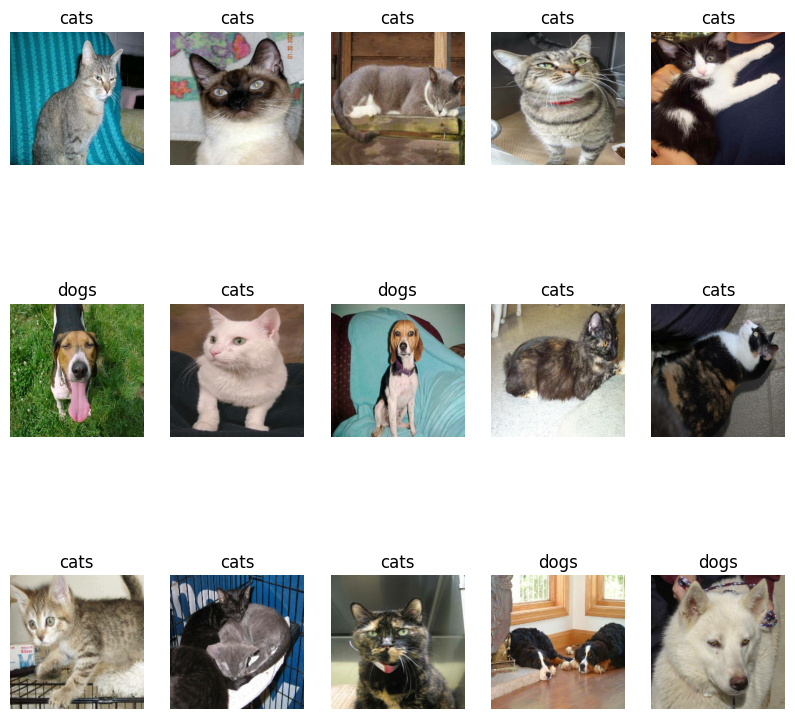

In [19]:
# Obtener las clases
class_names = train_dataset.class_names

# Mostrar algunas imágenes del conjunto de entrenamiento
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(15):
    ax = plt.subplot(3, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Como el conjunto de datos original no contiene un conjunto de prueba, creará uno. Para hacerlo, determine cuántos lotes de datos están disponibles en el conjunto de validación mediante tf.data.experimental.cardinality y luego mueva el 20 % de ellos a un conjunto de prueba.

In [22]:
# Dividir el conjunto de validación para prueba y validación
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [23]:
print('Número de lotes de validación: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Número de lotes de prueba: %d' % tf.data.experimental.cardinality(test_dataset))

Número de lotes de validación: 21
Número de lotes de prueba: 5


Configurar el conjunto de datos para el rendimiento

Utilice la captación previa almacenada en búfer para cargar imágenes desde el disco sin que la E/S se convierta en un bloqueo. Para obtener más información sobre este método, consulte la guía de rendimiento de datos .

In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

''' AUTOTUNE es una constante que hace parte de la API tf.data de TensorFlow.
Se utiliza para que el proceso de carga y preparación de datos se optimice de manera automática, permitiendo a TensorFlow ajustar dinámicamente el número de elementos
que se deben preprocesar en paralelo según la capacidad del sistema.
'''

' AUTOTUNE es una constante que hace parte de la API tf.data de TensorFlow.\nSe utiliza para que el proceso de carga y preparación de datos se optimice de manera automática, permitiendo a TensorFlow ajustar dinámicamente el número de elementos\nque se deben preprocesar en paralelo según la capacidad del sistema.\n'

Usar aumento de datos
Cuando no tiene un conjunto de datos de imágenes grande, es una buena práctica introducir artificialmente diversidad de muestras mediante la aplicación de transformaciones aleatorias pero realistas a las imágenes de entrenamiento, como la rotación y el volteo horizontal. Esto ayuda a exponer el modelo a diferentes aspectos de los datos de entrenamiento y reduce el sobreajuste . Puede obtener más información sobre el aumento de datos en este tutorial .

In [25]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),    # Voltea la imagen horizontalmente
    tf.keras.layers.RandomRotation(0.2),        # Rota hasta un 20%
    tf.keras.layers.RandomZoom(0.1),            # Hace zoom in o out hasta un 10%
    tf.keras.layers.RandomContrast(0.1),        # Ajusta el contraste ligeramente
])

Apliquemos repetidamente estas capas a la misma imagen y veamos el resultado.

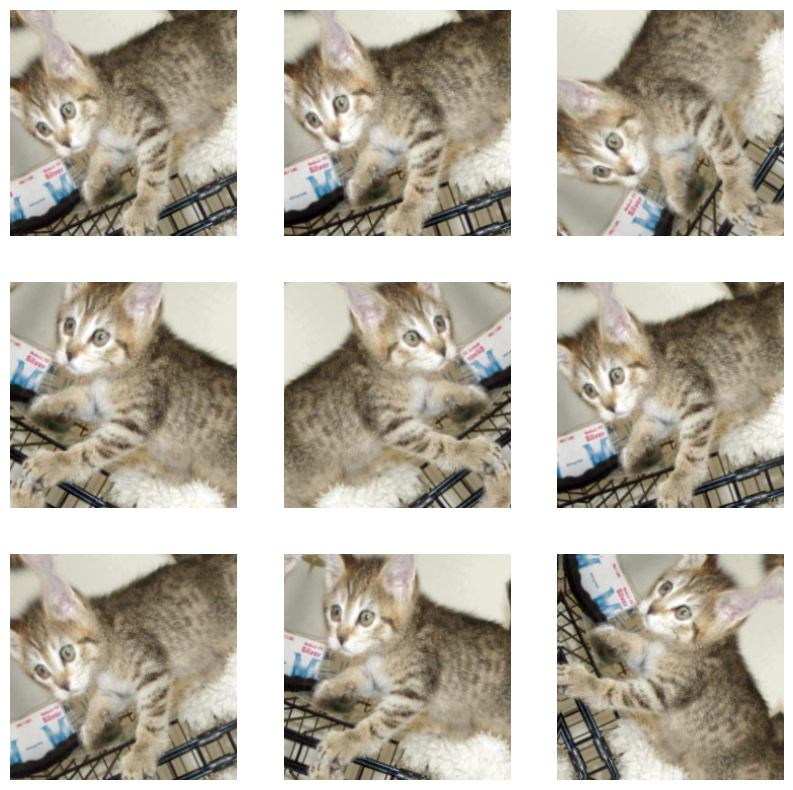

In [26]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

Cambiar la escala de los valores de píxeles
En un momento, descargará tf.keras.applications.MobileNetV2 para usarlo como su modelo base. Este modelo espera valores de píxel en [-1, 1] , pero en este punto, los valores de píxel en sus imágenes están en [0, 255] . Para volver a escalarlos, utilice el método de preprocesamiento incluido con el modelo.


El modelo VGG16 fue entrenado con imágenes que tienen un preprocesamiento específico, por lo que debemos aplicar la misma transformación a nuestras imágenes antes de pasarlas al modelo.

. Resta los valores medios de los canales RGB usados en ImageNet:

Red (R): 123.68
Green (G): 116.779
Blue (B): 103.939

.  ¿Por qué se hace esto?

VGG16 fue entrenado con imágenes de ImageNet, donde se usó esta normalización.
Restar estos valores ayuda al modelo a reconocer mejor los patrones de la imagen.
Evita que los valores de los píxeles sean demasiado grandes y acelera el entrenamiento.

In [27]:
#Preprocesamiento de la imagen para VGG16
preprocess_input = tf.keras.applications.vgg16.preprocess_input

Alternativamente, puede cambiar la escala de los valores de píxeles de [0, 255] a [-1, 1] usando tf.keras.layers.Rescaling .

Si usas modelos como MobileNet o EfficientNet que esperan imágenes normalizadas en [-1,1].

No es necesario para VGG16, porque ya usamos preprocess_input que aplica su propia normalización.



In [28]:
#rescale = tf.keras.layers.Rescaling(1./127.5, offset=-1)

si usa otras tf.keras.applications , asegúrese de consultar el documento de API para determinar si esperan píxeles en [-1, 1] o [0, 1] , o use la función preprocess_input incluida.

#Cree el modelo base a partir de las convnets* preentrenadas

**Redes neuronales convolucionales (Convolutional Neural Networks, CNNs)**

Creará el modelo base a partir del modelo MobileNet V2 desarrollado en Google. Esto se entrena previamente en el conjunto de datos de ImageNet, un gran conjunto de datos que consta de 1,4 millones de imágenes y 1000 clases. ImageNet es un conjunto de datos de entrenamiento de investigación con una amplia variedad de categorías como jackfruit y syringe . Esta base de conocimientos nos ayudará a clasificar perros y gatos a partir de nuestro conjunto de datos específico.


Primero, debe elegir qué capa de MobileNet V2 utilizará para la extracción de características. La última capa de clasificación (en "arriba", ya que la mayoría de los diagramas de modelos de aprendizaje automático van de abajo hacia arriba) no es muy útil. En su lugar, seguirá la práctica común de depender de la última capa antes de la operación de aplanado. Esta capa se denomina "capa de cuello de botella". Las características de la capa de cuello de botella conservan más generalidad en comparación con la capa final/superior.

Luego, cree una instancia de un modelo MobileNet V2 precargado con pesos entrenados en ImageNet. Al especificar el argumento include_top=False , carga una red que no incluye las capas de clasificación en la parte superior, lo que es ideal para la extracción de características.

In [29]:
# Crear el modelo base VGG16 preentrenado
base_model = tf.keras.applications.VGG16(
    weights='imagenet',  # Usando pesos preentrenados de ImageNet
    input_shape=(224, 224, 3),  # Tamaño de la imagen de entrada (224x224 píxeles, 3 canales para RGB)
    include_top=False  # No incluir la capa superior (capa de clasificación final)
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Este extractor de características convierte cada imagen de 224x224x3 en un bloque de características de 5x5x1280 . Veamos qué le hace a un lote de imágenes de ejemplo:

In [30]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 512)


#Extracción de características

En este paso, congelará la base convolucional creada en el paso anterior y la utilizará como extractor de características. Además, agrega un clasificador encima y entrena el clasificador de nivel superior.

#Congelar la base convolucional
Es importante congelar la base convolucional antes de compilar y entrenar el modelo. Congelar (estableciendo layer.trainable = False) evita que los pesos en una capa determinada se actualicen durante el entrenamiento. MobileNet V2 tiene muchas capas, por lo que establecer la bandera trainable de todo el modelo en False las congelará todas.



In [31]:
# Congelar las capas del modelo base
base_model.trainable = False


###Nota importante sobre las capas de BatchNormalization

Muchos modelos contienen capas tf.keras.layers.BatchNormalization . Esta capa es un caso especial y se deben tomar precauciones en el contexto del ajuste fino, como se muestra más adelante en este tutorial.

Cuando establece layer.trainable = False , la capa BatchNormalization se ejecutará en modo de inferencia y no actualizará sus estadísticas de media y varianza.

Cuando descongela un modelo que contiene capas de BatchNormalization para realizar un ajuste fino, debe mantener las capas de BatchNormalization en modo de inferencia pasando training = False al llamar al modelo base. De lo contrario, las actualizaciones aplicadas a los pesos no entrenables destruirán lo aprendido por el modelo.

Para obtener más detalles, consulta la guía de aprendizaje de Transfer .

In [32]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Agregar un encabezado de clasificación
Para generar predicciones a partir del bloque de entidades, promedie las ubicaciones espaciales de 5x5 utilizando una capa tf.keras.layers.

GlobalAveragePooling2D para convertir las entidades en un único vector de 1280 elementos por imagen.

✔ Convierte las características extraídas por VGG16 en un solo vector por imagen.

✔ Reduce la cantidad de parámetros sin perder información clave.

✔ Mejor alternativa a **Flatten()** (que generaría demasiados parámetros).


In [33]:
# Añadir capas adicionales para nuestra tarea específica (perros y gatos)
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1, activation='sigmoid')  # Salida binaria (perro/gato)


In [34]:
capa1=tf.keras.layers.Dense(128, activation='relu')

Cree un modelo encadenando las capas de aumento de datos, reescalado, base_model y extractor de características mediante la API funcional de Keras . Como se mencionó anteriormente, use training=False ya que nuestro modelo contiene una capa BatchNormalization .

In [35]:
# Construir el modelo completo
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)  # Aplicar aumento de datos
x = preprocess_input(x)  # Preprocesamiento para VGG16
x = base_model(x, training=False)  # Usar el modelo base VGG16 sin entrenar
x = global_average_layer(x)  # Promediar las características extraídas
x = tf.keras.layers.Dropout(0.2)(x)  # Regularización mediante Dropout
x = capa1(x)  # Capa intermedia
outputs = prediction_layer(x)  # Capa de salida

model = tf.keras.Model(inputs, outputs)

In [36]:
# Compilar el modelo
base_learning_rate = 0.0001

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy,
              metrics=['accuracy'])

In [37]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 224, 224,  │          0 │ input_layer_3[0]… │
│ (Sequential)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item (GetItem)  │ (None, 224, 224)  │          0 │ sequential[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_1          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ get_item_2          │ (None, 224, 224)  │          0 │ sequential[0][0]  │
│ (GetItem)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stack (Stack)       │ (None, 224, 224,  │          0 │ get_item[0][0],   │
│                     │ 3)                │            │ get_item_1[0][0], │
│                     │                   │            │ get_item_2[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 224, 224,  │          0 │ stack[0][0]       │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vgg16 (Functional)  │ (None, 7, 7, 512) │ 14,714,688 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 512)       │          0 │ vgg16[0][0]       │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 512)       │          0 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     65,664 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │        129 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Los 2,5 millones de parámetros en MobileNet están congelados, pero hay 1,2 mil parámetros entrenables en la capa densa. Estos se dividen entre dos objetos tf.Variable , los pesos y los sesgos. PAra este ejemplo que estamos usando VGG16, los paramtros del modelo son: 14,714,688 y estan congelados.

In [38]:
len(model.trainable_variables)

4

entrenar al modelo
Después de entrenar durante 10 épocas, debería ver una precisión de ~94 % en el conjunto de validación.



In [39]:
# Entrenamiento del modelo
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 246ms/step - accuracy: 0.5482 - loss: 2.1752 - val_accuracy: 0.8843 - val_loss: 0.3126
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.8338 - loss: 0.4681 - val_accuracy: 0.9522 - val_loss: 0.1377
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - accuracy: 0.8871 - loss: 0.3120 - val_accuracy: 0.9645 - val_loss: 0.0883
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - accuracy: 0.9045 - loss: 0.2569 - val_accuracy: 0.9769 - val_loss: 0.0735
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.8996 - loss: 0.2879 - val_accuracy: 0.9799 - val_loss: 0.0503
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.9202 - loss: 0.2131 - val_accuracy: 0.9830 - val_loss: 0.0581
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - accuracy: 0.9181 - loss: 0.2447 - val_accuracy: 0.9830 - val_loss: 0.0451
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.9205 - loss: 0.2119 - val_accu

#Curvas de aprendizaje
Echemos un vistazo a las curvas de aprendizaje de la precisión/pérdida de capacitación y validación cuando se usa el modelo base de MobileNetV2 como un extractor de características fijas.

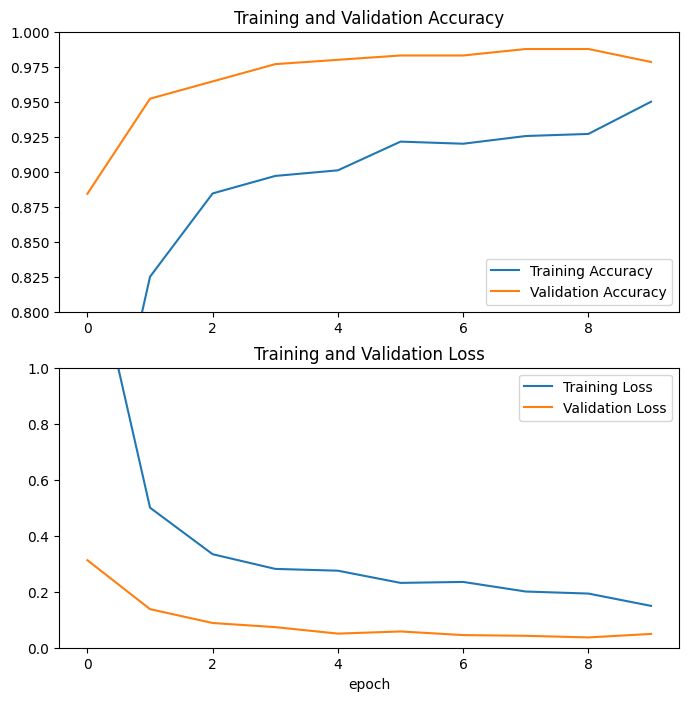

In [40]:
# Mostrar las gráficas de precisión y pérdida
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [41]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - accuracy: 0.9923 - loss: 0.0181
Test accuracy : 0.9937499761581421


In [42]:
# Realizar predicciones sobre un lote de imágenes de prueba
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Aplicar sigmoide a las predicciones (ya que estamos usando activación sigmoide en la salida)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predicciones:\n', predictions.numpy())
print('Etiquetas:\n', label_batch)

Predicciones:
 [0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1]
Etiquetas:
 [0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 0 1]


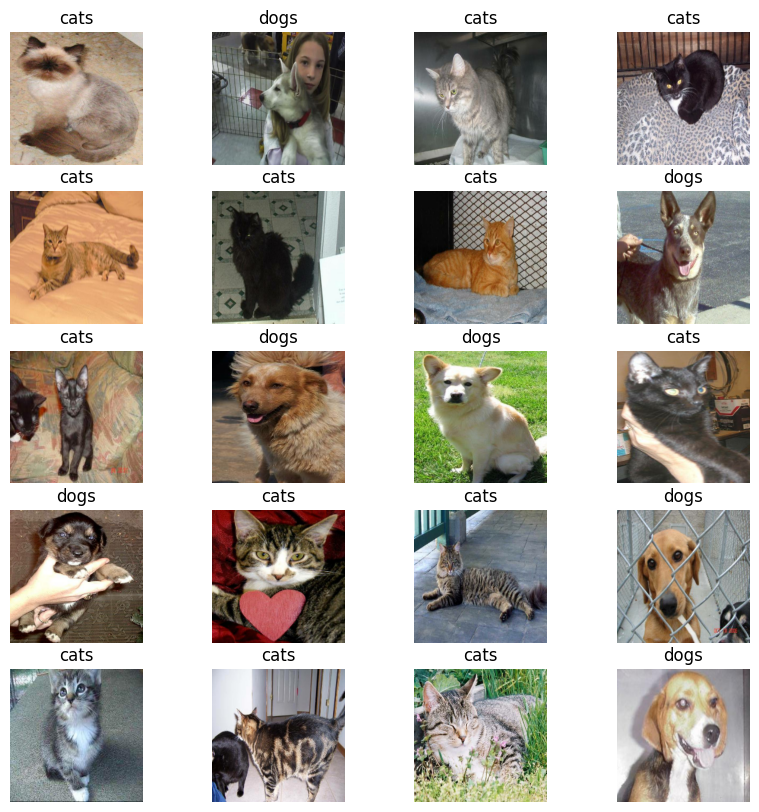

In [43]:
# Mostrar imágenes y sus predicciones
plt.figure(figsize=(10, 10))
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

si se pregunta por qué las métricas de validación son claramente mejores que las métricas de entrenamiento, el factor principal es que capas como tf.keras.layers.BatchNormalization y tf.keras.layers.Dropout afectan la precisión durante el entrenamiento. Se desactivan al calcular la pérdida de validación.

En menor medida, también se debe a que las métricas de entrenamiento informan el promedio de una época, mientras que las métricas de validación se evalúan después de la época, por lo que las métricas de validación ven un modelo que se ha entrenado un poco más.

#Sintonia FINA -Fine Tunning-

En el experimento de extracción de características, solo estaba entrenando algunas capas sobre un modelo base de MobileNetV2. Los pesos de la red preentrenada no se actualizaron durante el entrenamiento.

Una forma de aumentar aún más el rendimiento es entrenar (o "afinar") los pesos de las capas superiores del modelo preentrenado junto con el entrenamiento del clasificador que agregó. El proceso de entrenamiento obligará a ajustar los pesos de los mapas de características genéricas a las características asociadas específicamente con el conjunto de datos.

Esto solo debe intentarse después de haber entrenado el clasificador de nivel superior con el modelo preentrenado establecido en no entrenable. Si agrega un clasificador inicializado aleatoriamente encima de un modelo previamente entrenado e intenta entrenar todas las capas juntas, la magnitud de las actualizaciones de gradiente será demasiado grande (debido a los pesos aleatorios del clasificador) y su modelo previamente entrenado olvidar lo que ha aprendido.

Además, debe intentar ajustar una pequeña cantidad de capas superiores en lugar de todo el modelo de MobileNet. En la mayoría de las redes convolucionales, cuanto más arriba está una capa, más especializada es. Las primeras capas aprenden características muy simples y genéricas que se generalizan a casi todos los tipos de imágenes. A medida que avanza, las funciones son cada vez más específicas para el conjunto de datos en el que se entrenó el modelo. El objetivo del ajuste fino es adaptar estas características especializadas para que funcionen con el nuevo conjunto de datos, en lugar de sobrescribir el aprendizaje genérico.

Descongele las capas superiores del modelo.
Todo lo que necesita hacer es descongelar el base_model y configurar las capas inferiores para que no se puedan entrenar. Luego, debe volver a compilar el modelo (necesario para que estos cambios surtan efecto) y reanudar el entrenamiento.

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Número de capas en el modelo base.: ", len(base_model.layers))

# Descongelar las capas superiores para fine-tuning
base_model.trainable = True
fine_tune_at = 15  # Número de capas que quieres descongelar

# Congelar las primeras capas
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

#Compilar el modelo
Como está entrenando un modelo mucho más grande y quiere readaptar los pesos previamente entrenados, es importante usar una tasa de aprendizaje más baja en esta etapa. De lo contrario, su modelo podría sobreajustarse muy rápidamente.

In [ ]:
base_learning_rate=0.001
# Recompilar el modelo con un aprendizaje más bajo
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate / 10),
              loss=tf.keras.losses.BinaryCrossentropy,
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
len(model.trainable_variables)

#Continuar entrenando al modelo
Si se entrenó antes para la convergencia, este paso mejorará su precisión en algunos puntos porcentuales.

In [ ]:
# Continuar el entrenamiento (ajuste fino)
fine_tune_epochs = 10
history_fine = model.fit(train_dataset,
                         epochs=fine_tune_epochs,
                         validation_data=validation_dataset)

Echemos un vistazo a las curvas de aprendizaje de la precisión/pérdida de entrenamiento y validación cuando se ajustan las últimas capas del modelo base de MobileNetV2 y se entrena el clasificador encima. La pérdida de validación es mucho mayor que la pérdida de entrenamiento, por lo que es posible que se sobreajuste.

También es posible que se sobreajuste, ya que el nuevo conjunto de entrenamiento es relativamente pequeño y similar a los conjuntos de datos originales de MobileNetV2.

Después de un ajuste fino, el modelo alcanza casi el 98 % de precisión en el conjunto de validación.

In [ ]:
loss = history_fine.history['loss'] # Reassign loss to the concatenated lists.
val_loss = history_fine.history['val_loss'] # Reassign val_loss to the concatenated lists.

acc = history_fine.history['accuracy'] # Reassign acc to the concatenated lists.
val_acc = history_fine.history['val_accuracy'] # Reassign val_acc to the concatenated lists.

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([0,fine_tune_epochs],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([0,fine_tune_epochs],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Evaluación y predicción
Finalmente, puede verificar el rendimiento del modelo en nuevos datos utilizando un conjunto de prueba.

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

Y ahora está todo listo para usar este modelo para predecir si su mascota es un gato o un perro.

In [ ]:
# Recuperar un lote de imágenes del conjunto de prueba
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()


predictions = tf.where(predictions < 0.5, 0, 1)

print('Predicciones:\n', predictions.numpy())
print('Etiquetas:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

#Resumen
Uso de un modelo previamente entrenado para la extracción de características : cuando se trabaja con un conjunto de datos pequeño, es una práctica común aprovechar las características aprendidas por un modelo entrenado en un conjunto de datos más grande en el mismo dominio. Esto se hace instanciando el modelo previamente entrenado y agregando un clasificador completamente conectado en la parte superior. El modelo preentrenado se "congela" y solo los pesos del clasificador se actualizan durante el entrenamiento. En este caso, la base convolucional extrajo todas las características asociadas con cada imagen y solo entrenó un clasificador que determina la clase de imagen dado ese conjunto de características extraídas.

Ajuste fino de un modelo preentrenado : para mejorar aún más el rendimiento, es posible que desee reutilizar las capas de nivel superior de los modelos preentrenados para el nuevo conjunto de datos a través del ajuste fino. En este caso, ajustó sus ponderaciones de modo que su modelo aprendiera características de alto nivel específicas del conjunto de datos. Esta técnica generalmente se recomienda cuando el conjunto de datos de entrenamiento es grande y muy similar al conjunto de datos original en el que se entrenó el modelo previamente entrenado.

